import


In [ ]:
import os
import pandas
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
import numpy as np
import pandas as pd
import seaborn as sns
from joblib import dump, load
from matplotlib import pyplot as plt


Load and Explore


Load the dataset (as a dataframe) using pandas and display the top 5 rows of the dataframe and then check for missing values and impute missing values with mean



In [ ]:
from google.colab import files
uploaded = files.upload()


Saving InsuranceData.csv to InsuranceData.csv


In [ ]:
df = pd.read_csv('InsuranceData.csv')
df.head(5)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Get a brief description and do some EDA to get familiar with the dataset



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df['region'].value_counts()


,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


Preprocessing


In [ ]:
df['sex'] = LabelEncoder().fit_transform(df['sex'])
df['smoker'] = LabelEncoder().fit_transform(df['smoker'])

df['sex'] = df['sex'].astype(bool)
df['smoker'] = df['smoker'].astype(bool)


In [ ]:
region = pd.get_dummies(df['region'])
df = pd.concat([df, region], axis = 1)
df.drop('region', axis = 1, inplace = True)


In [12]:
df.fillna(df.mean(), inplace=True)


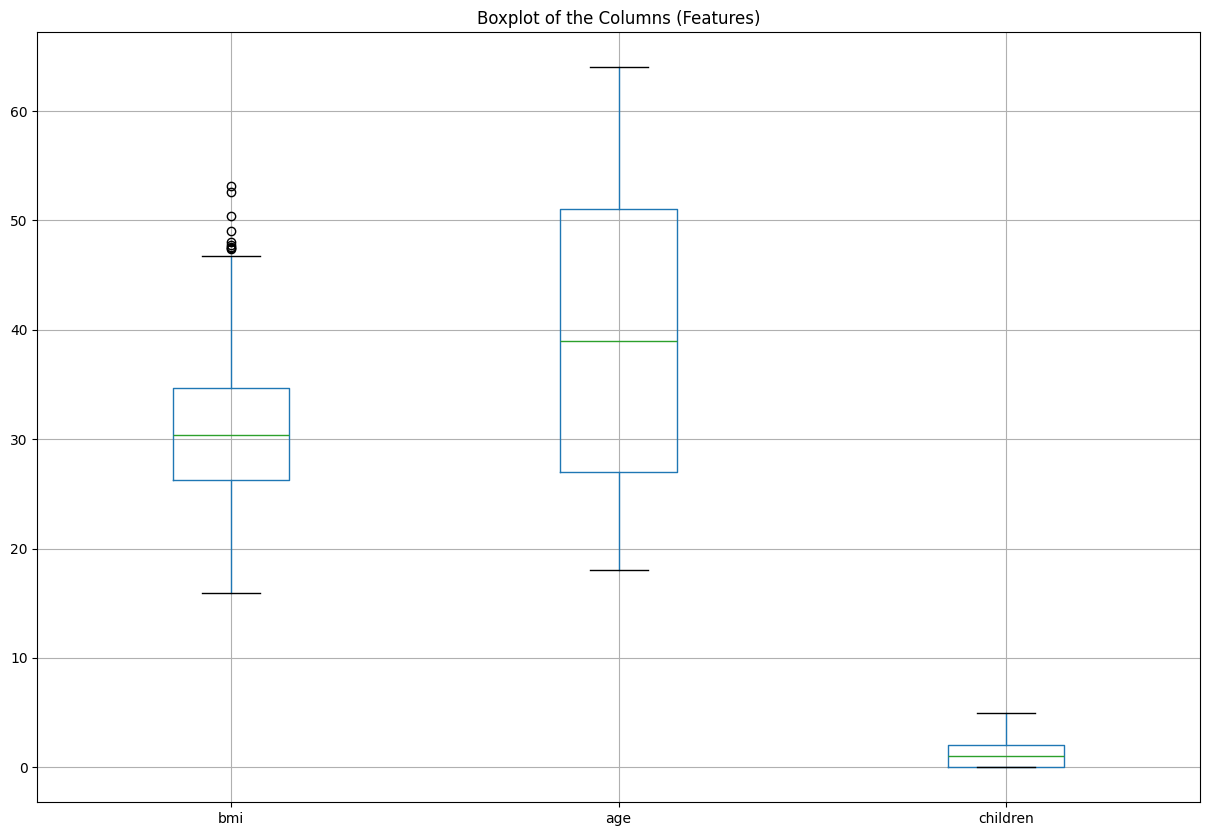

Total of 9 outliers detected. Data has been scaled.
[[-0.45332    -1.43876426 -0.90861367]
 [ 0.5096211  -1.50996545 -0.07876719]
 [ 0.38330685 -0.79795355  1.58092576]
 [-1.30553108 -0.4419476  -0.90861367]
 [-0.29255641 -0.51314879 -0.90861367]]


In [14]:
plt.figure(figsize=(15, 10))
plt.title("Boxplot of the Columns (Features)")

X = df[['bmi', 'age', 'children']]

X.boxplot()

plt.show()


Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1
outliers = ((X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))).any(axis=1).sum()


if outliers > 0:
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    print(f"Total of {outliers} outliers detected. Data has been scaled.")
    print(X_scaled[:5])
else:
    print("No outliers detected.")


In [15]:
# TODO: Split the dataset into two parts such that the training set contains 80% of the samples.


In [16]:
X = df.drop('charges', axis = 1)
y = df['charges']
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8)


In [17]:
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)


Training


Fit a linear regressor to the data. (Use sklearn)



In [18]:
lr = LinearRegression()
lr.fit(x_train, y_train)


LinearRegression()

Get the coefficients of the variables and visualize it


Coefficients of the variables in the sklearn:  [3557.36397545  -75.03801128 2116.66229106  637.45840196 9688.87825389
  226.27125062  110.37489577 -212.27309971 -117.69758146]


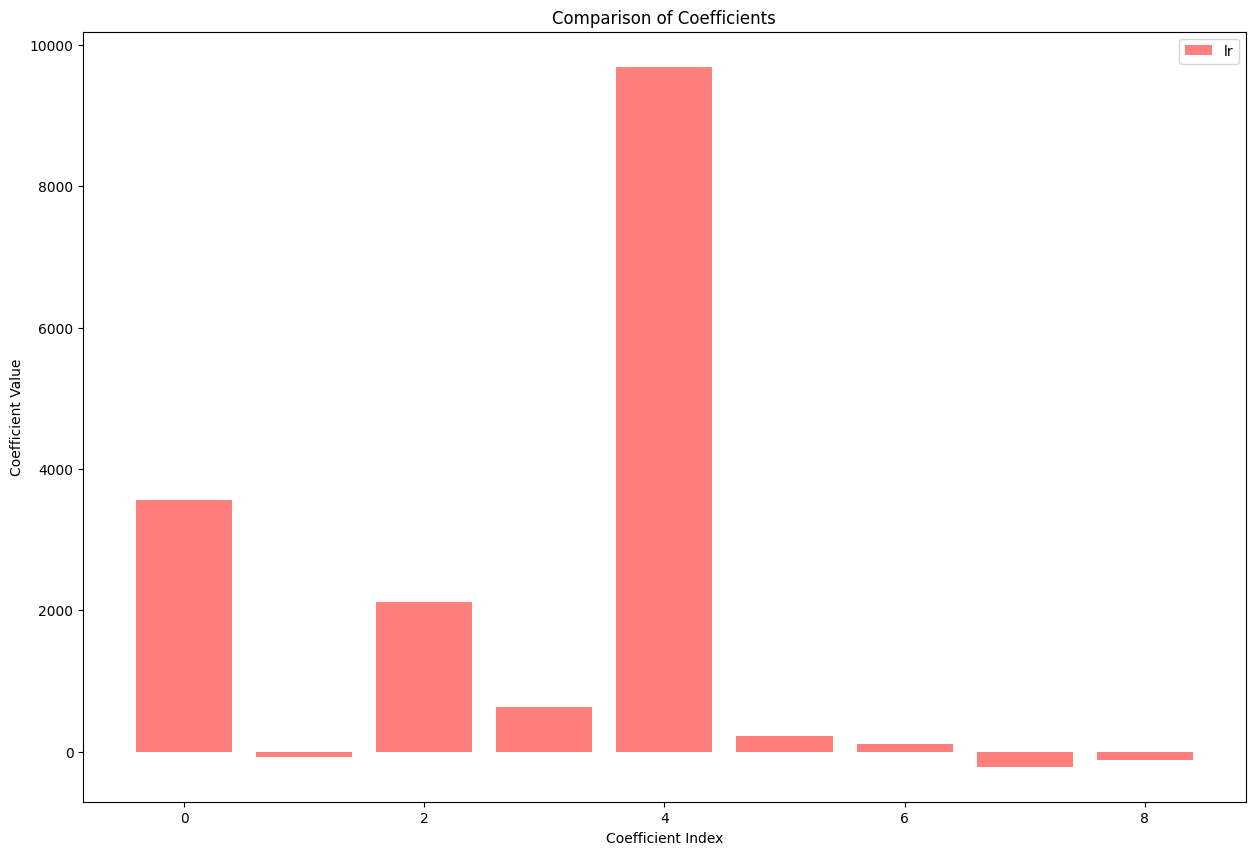

In [20]:
def visualize_coef(model, label, color):
    print("Coefficients of the variables in the sklearn: ", model.coef_)

    plt.figure(figsize=(15, 10))
    plt.bar(range(len(model.coef_)), model.coef_, label=label, color=color, alpha=0.5)
    plt.xlabel("Coefficient Index")
    plt.ylabel("Coefficient Value")
    plt.title("Comparison of Coefficients")
    plt.legend()

    plt.show()

visualize_coef(lr, "lr", "r")


In [21]:
# TODO: Calculate R² score and MSE on the training dataset
def calc_scores(model, X, y):
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    return r2, mse

r2, mse = calc_scores(lr, x_train, y_train)

print("R² score on the training dataset: ", r2)
print("MSE on the training dataset: ", mse)


R² score on the training dataset:  0.7533559236472598
MSE on the training dataset:  36591891.10023088


Regularization


L1 regularization, also known as Lasso (Least Absolute Shrinkage and Selection Operator) regularization, is a technique used in regression models that encourages simplicity and sparsity in the model coefficients. This is achieved by adding a penalty equal to the absolute value of the magnitude of coefficients to the loss function.
Train a regression model using L1 regularization.



In [22]:
# TODO: Use Lasso from sklearn library

lasso_lr = Lasso(alpha=0.5)
lasso_lr.fit(x_train, y_train)


lasso_lr_low_alpha = Lasso(alpha=0.1)
lasso_lr_low_alpha.fit(x_train, y_train)


lasso_lr_high_alpha = Lasso(alpha=2)
lasso_lr_high_alpha.fit(x_train, y_train)


Lasso(alpha=2)

Get the coefficients of the variables and visualize it.



Coefficients of the variables in the sklearn:  [ 3.55702075e+03 -7.44968978e+01  2.11590267e+03  6.36992417e+02
  9.68825784e+03  3.38120467e+02  2.22379400e+02 -9.55140557e+01
 -5.59738788e+00]


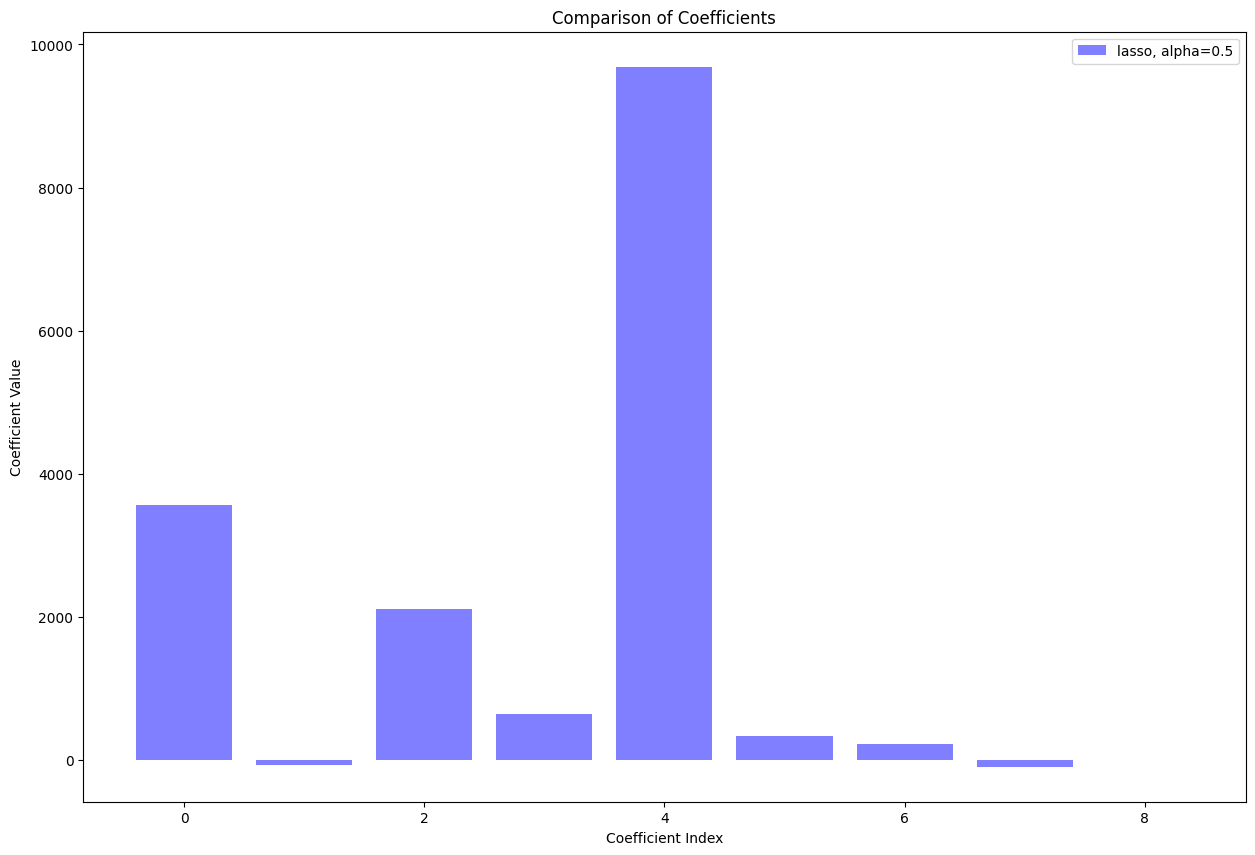

Coefficients of the variables in the sklearn:  [ 3.55729389e+03 -7.49299179e+01  2.11651184e+03  6.37365334e+02
  9.68875453e+03  3.38694338e+02  2.22945493e+02 -9.57138663e+01
 -5.69646671e+00]


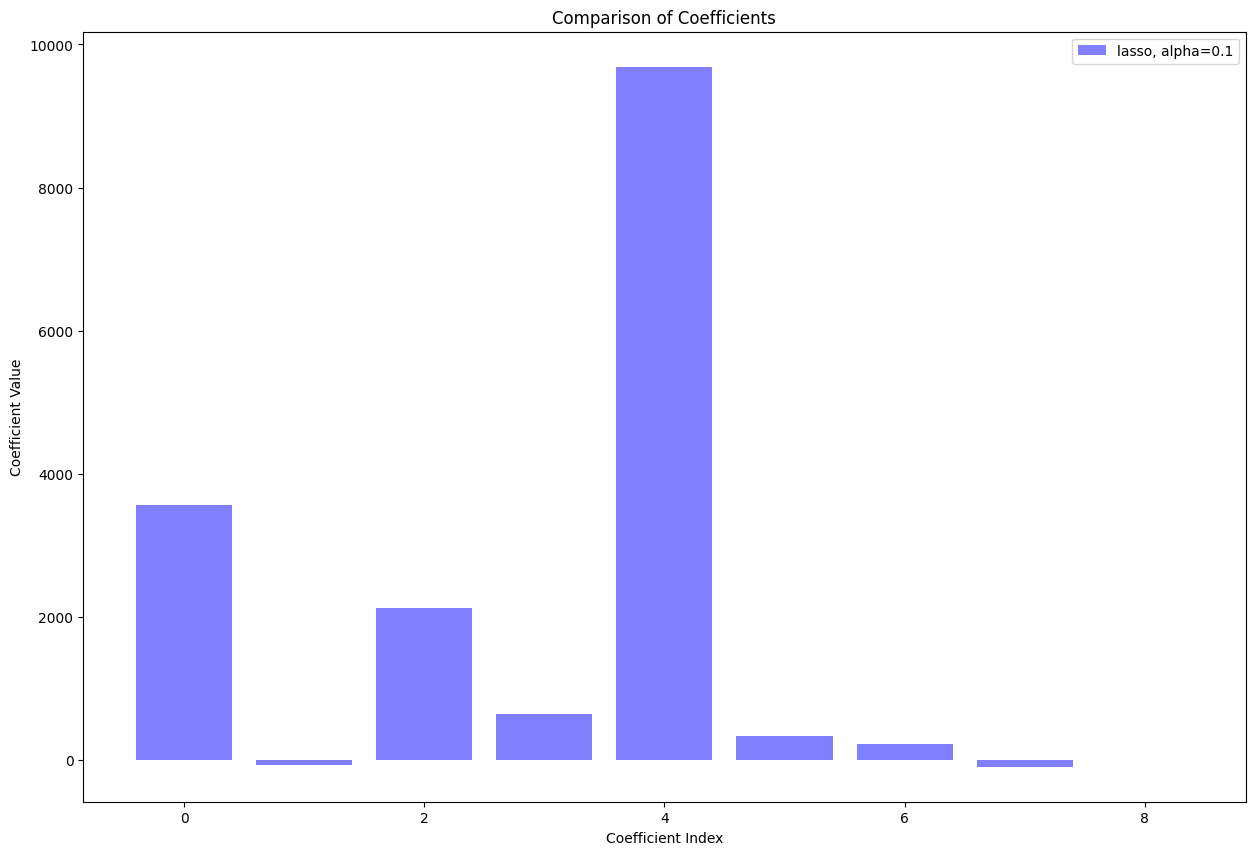

Coefficients of the variables in the sklearn:  [ 3.55595299e+03 -7.28826465e+01  2.11365123e+03  6.35597114e+02
  9.68640348e+03  3.35976495e+02  2.20262015e+02 -9.47602455e+01
 -5.22003150e+00]


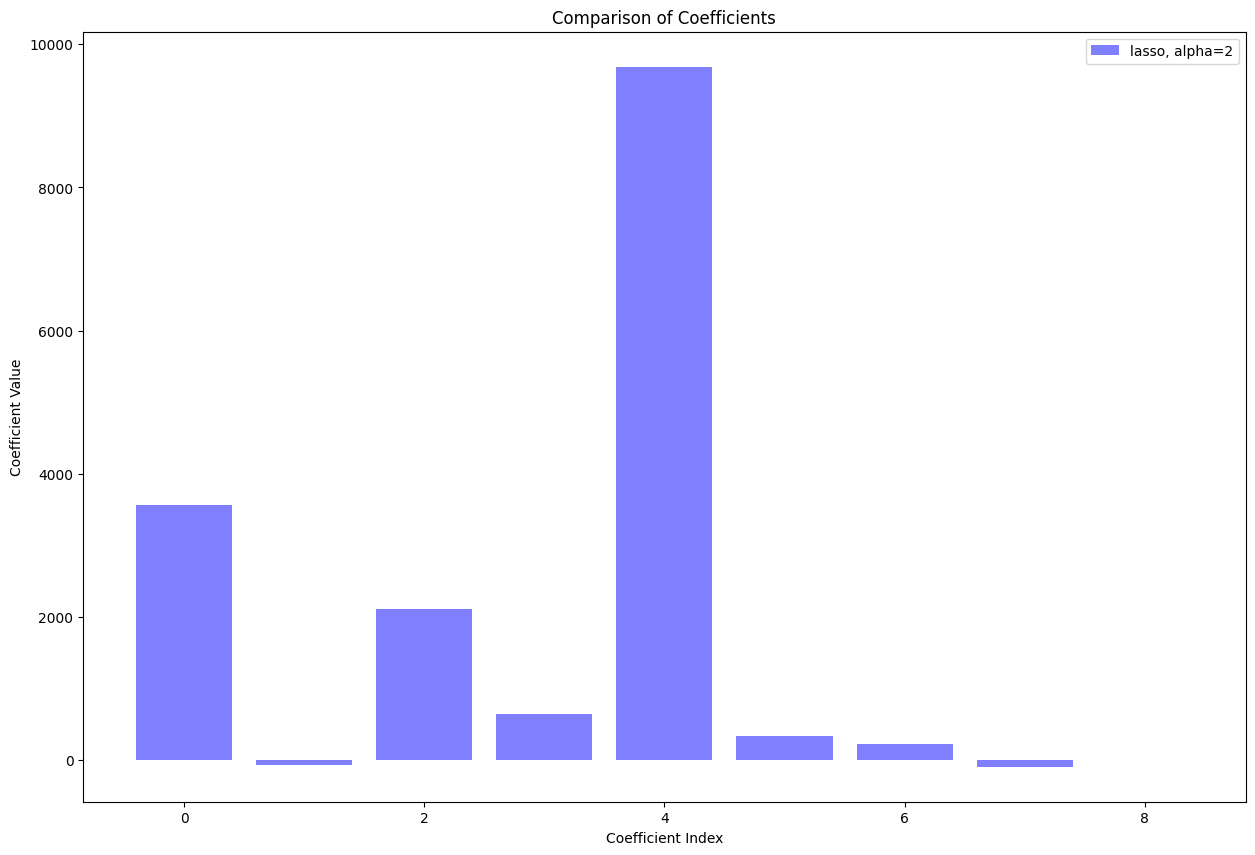

In [23]:
visualize_coef(lasso_lr, "lasso, alpha=0.5", "b")
visualize_coef(lasso_lr_low_alpha, "lasso, alpha=0.1", "b")
visualize_coef(lasso_lr_high_alpha, "lasso, alpha=2", "b")


Train a regression model using L2 regularization.


In [25]:
# TODO: Use Ridge from sklearn library
Ridge_lr = Ridge(alpha=0.5)
Ridge_lr.fit(x_train, y_train)


Ridge_lr_low_alpha = Ridge(alpha=0.1)
Ridge_lr_low_alpha.fit(x_train, y_train)


Ridge_lr_high_alpha = Ridge(alpha=2)
Ridge_lr_high_alpha.fit(x_train, y_train)


Ridge(alpha=2)

Coefficients of the variables in the sklearn:  [3555.85602558  -74.64748202 2115.53621824  637.27673608 9684.24635375
  226.01340682  110.11356097 -211.76588668 -117.70307267]


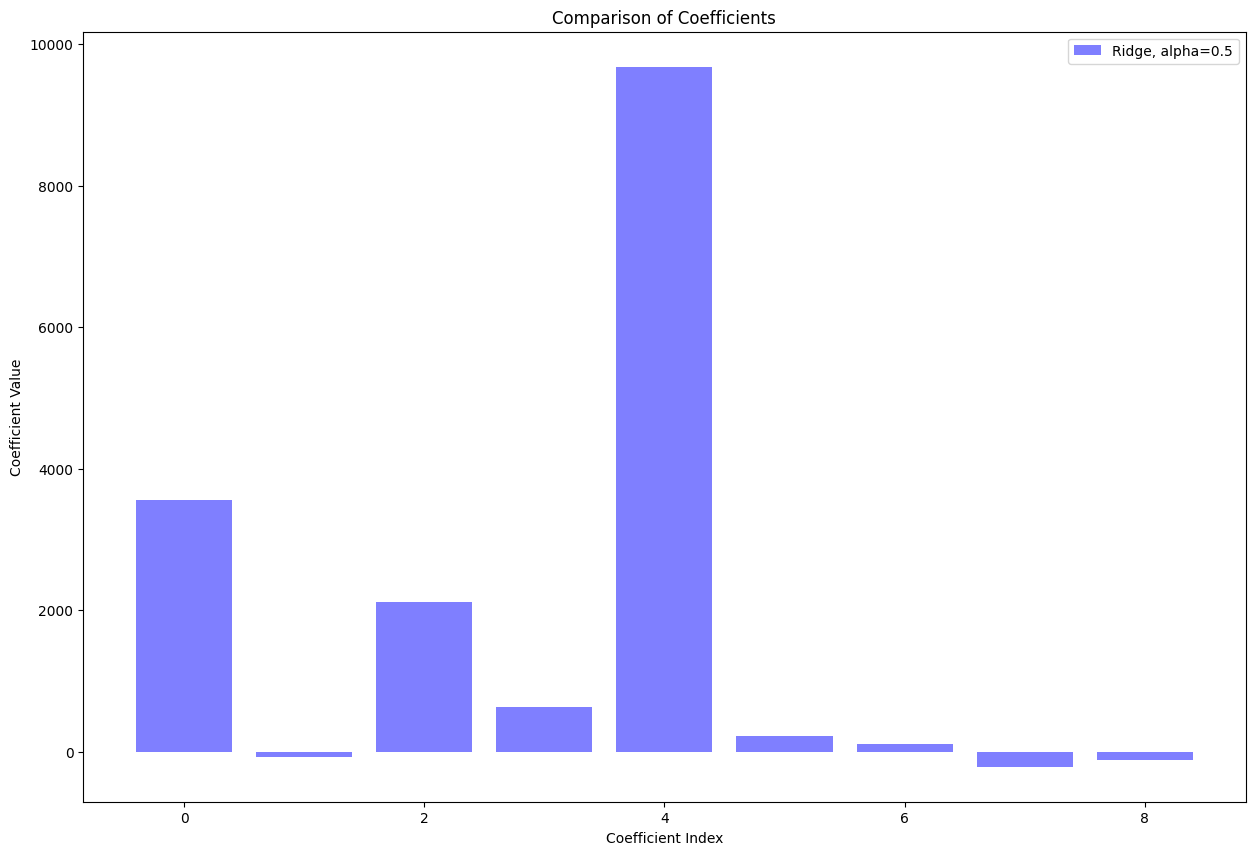

Coefficients of the variables in the sklearn:  [3557.06228816  -74.9598487  2116.43696887  637.42206403 9687.95151384
  226.21965194  110.32259462 -212.17159164 -117.69868331]


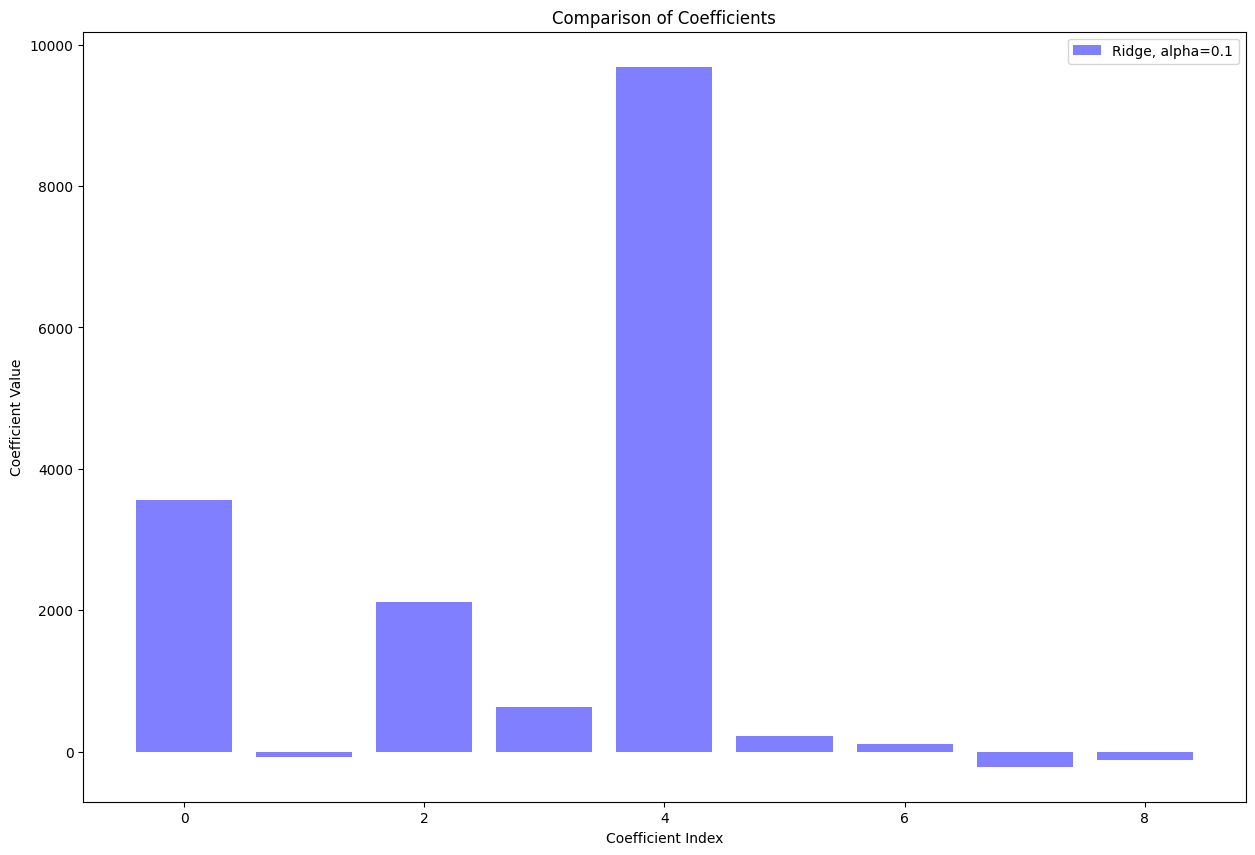

Coefficients of the variables in the sklearn:  [3551.33946412  -73.48013726 2112.16605252  636.7320952  9670.37760419
  225.24211381  109.33211412 -210.24914422 -117.719276  ]


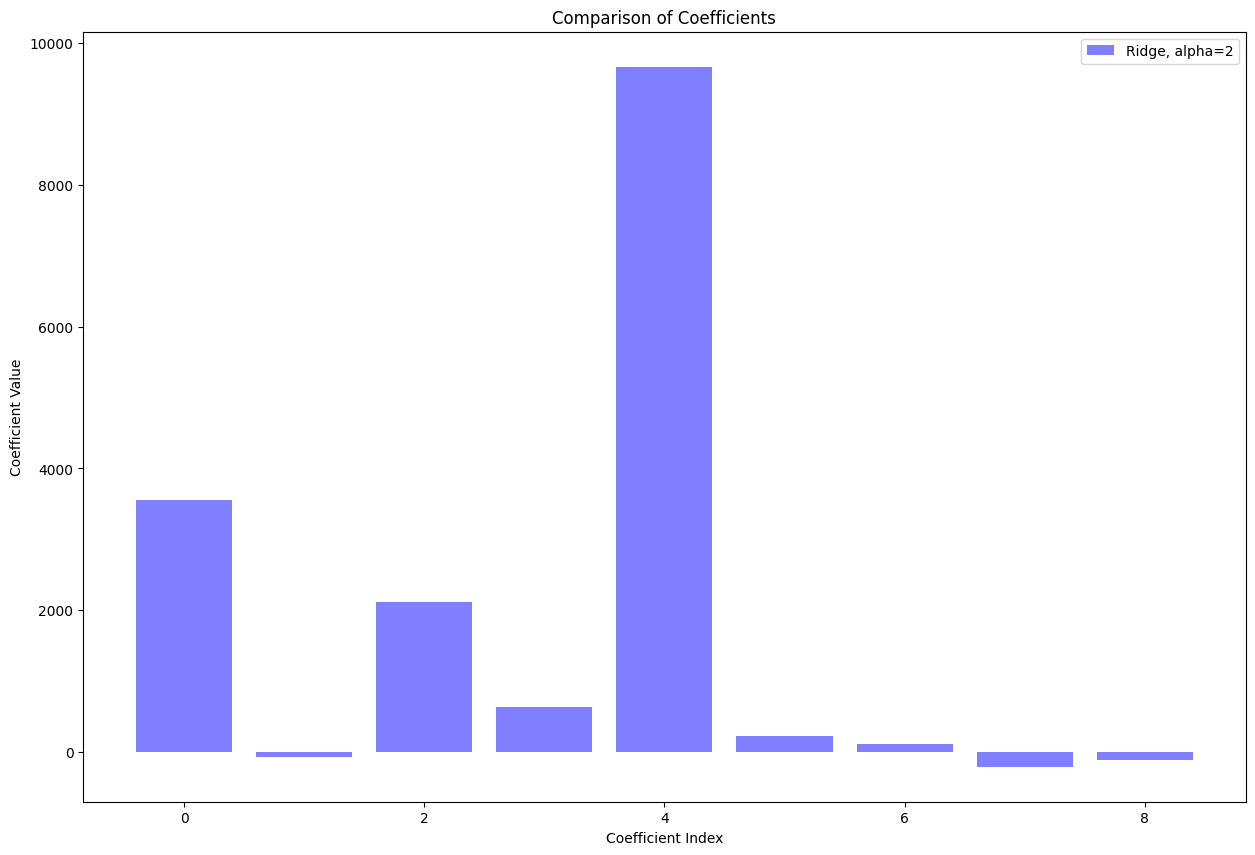

In [26]:
visualize_coef(Ridge_lr, "Ridge, alpha=0.5", "b")
visualize_coef(Ridge_lr_low_alpha, "Ridge, alpha=0.1", "b")
visualize_coef(Ridge_lr_high_alpha, "Ridge, alpha=2", "b")


Test different regularization parameters (alpha) using cross validation. Use MAPE for evaluation.



In [27]:
# TODO: Use folding methods from sklearn library
kf = KFold(n_splits=5, shuffle=True, random_state=42)

alphas = [0.1, 1, 10, 100]
results = {}

for alpha in alphas:
    model = Ridge(alpha=alpha)
    scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_absolute_percentage_error')
    results[alpha] = np.mean(np.abs(scores))

print("Cross-validated MSE for different alphas:", results)


Cross-validated MSE for different alphas: {0.1: 0.42458928052715095, 1: 0.4260798492770169, 10: 0.44201534525871755, 100: 0.6000178841960497}


In [28]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

alphas = [0.1, 1, 10, 100]
results = {}

for alpha in alphas:
    model = Lasso(alpha=alpha)
    scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_absolute_percentage_error')
    results[alpha] = np.mean(np.abs(scores))

print("Cross-validated MSE for different alphas:", results)


Cross-validated MSE for different alphas: {0.1: 0.4244255880219555, 1: 0.4244699861313177, 10: 0.4247873846372263, 100: 0.43195954784776147}


Add extra variables to dataset to make model more complex, then compare the results.



In [30]:
# TODO: Increase No. of dimensions using PolynomialFeatures from sklearn
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)

x_train, x_test, y_train, y_test = train_test_split(X_poly, y, train_size=0.8)
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

lr = LinearRegression()
lr.fit(x_train, y_train)
mean_absolute_percentage_error(y_test, lr.predict(x_test))


0.28770877291051294

Coefficients of the variables in the sklearn:  [ 3.48589634e-14 -1.16846907e+03 -1.80305437e+02  2.81531351e+03
  1.03364822e+03 -2.79047838e+03 -1.32305976e+02 -3.32518049e+02
  2.62090211e+02  1.91773330e+02  4.49099907e+03  1.79087186e+02
  7.01663428e+02 -1.64236269e+02 -2.47705906e+02 -6.76849472e+02
  9.39507029e+01 -1.91569274e+01 -2.80078799e+02 -1.80305437e+02
  2.44102685e+02 -1.32132710e+02 -5.91497386e+01 -1.32746979e+02
 -2.29667616e+01  2.71202936e+01 -1.51745325e+02 -3.23502350e+03
  9.11318045e+01  1.85659336e+04  1.39116600e+03  4.87807235e+02
 -4.33149153e+02 -4.44992179e+01 -6.92967947e+02 -1.19220778e+02
  4.64564627e+02  7.87028225e+02  2.25601650e+02  1.68548677e+02
 -2.79047838e+03 -1.30460510e+03 -1.28710529e+03 -1.54884441e+03
 -9.05557157e+02 -1.32305976e+02  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -3.32518049e+02  0.00000000e+00  0.00000000e+00
  2.62090211e+02  0.00000000e+00  1.91773330e+02]


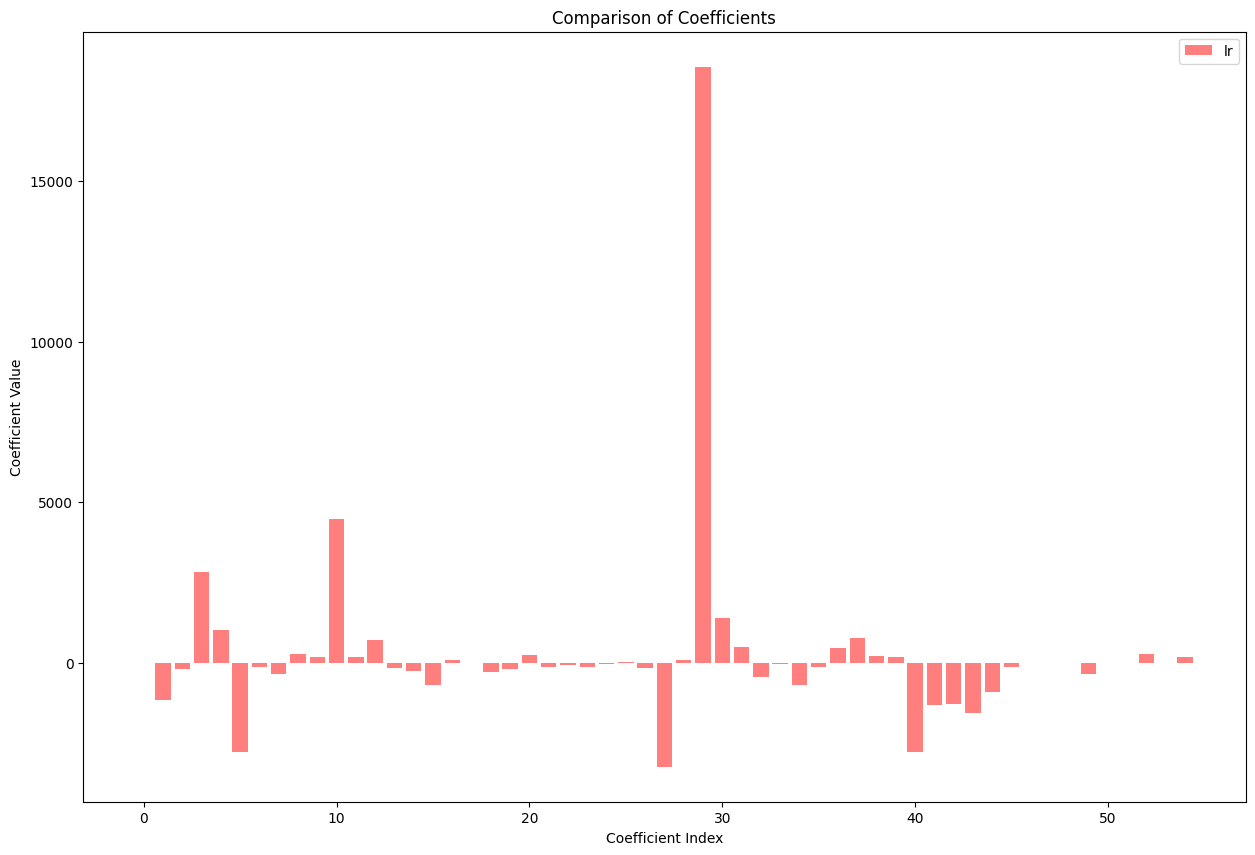

In [31]:
# TODO:
visualize_coef(lr, "lr", "r")



In [32]:
lasso = Lasso(alpha=10)
lasso.fit(x_train, y_train)
mean_absolute_percentage_error(y_test, lasso.predict(x_test))


0.2788500118932422

Coefficients of the variables in the sklearn:  [ 0.00000000e+00 -0.00000000e+00 -4.89362494e+01  2.11200504e+03
  8.82319512e+02 -3.60512346e+01 -6.60690940e+00 -2.14178280e+02
  1.71362353e+02  0.00000000e+00  3.63108298e+03  0.00000000e+00
  3.18790389e+02 -0.00000000e+00 -1.76427505e+02 -6.19510623e+02
  0.00000000e+00  1.51862309e+01 -1.47801301e+02 -0.00000000e+00
 -0.00000000e+00 -7.06254210e+01 -5.59374289e+00 -8.28743778e+01
 -0.00000000e+00  4.73969652e+01 -9.89579697e+01 -2.17439264e+03
  1.59043132e+02  1.78862208e+04  9.61430090e+02  0.00000000e+00
 -3.19598002e+02  0.00000000e+00 -4.92757583e+02 -1.03834102e+02
  2.28221667e+02  5.61467935e+02  0.00000000e+00 -3.99108485e+01
 -7.35110257e+03 -0.00000000e+00 -1.28591996e+02 -2.13694977e+01
  2.34932955e+02 -3.69448939e+01  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -1.11109510e+01  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  3.07247259e+01]


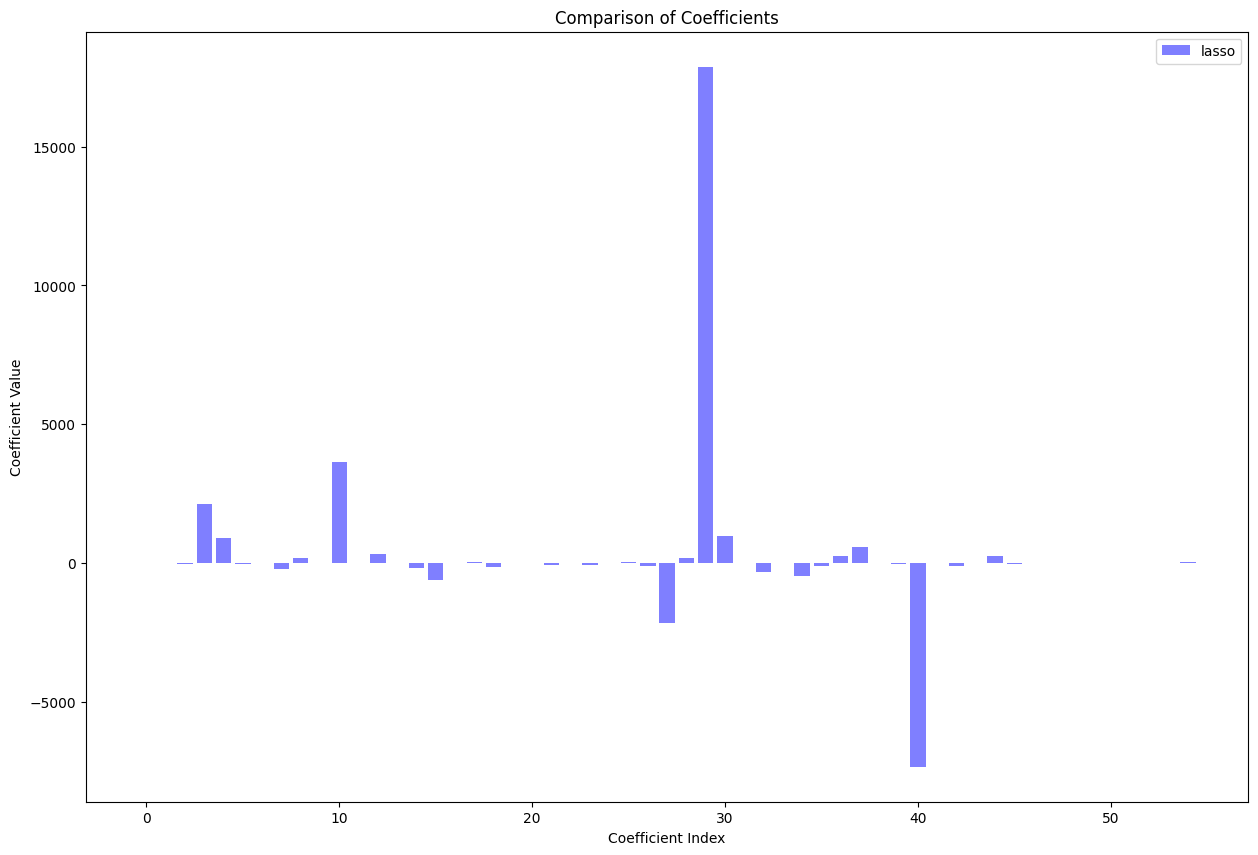

In [33]:
visualize_coef(lasso, "lasso", "b")


In [34]:
Ridge = Ridge(alpha=10)
Ridge.fit(x_train, y_train)
mean_absolute_percentage_error(y_test, Ridge.predict(x_test))


0.28843560143641434

Coefficients of the variables in the sklearn:  [ 0.00000000e+00  5.27398417e+01 -1.63157322e+02  1.35050233e+03
  5.25218082e+02 -1.33320152e+03 -1.84252777e+02 -2.12604174e+02
  1.74230307e+02  2.16250221e+02  3.01030032e+03  6.26948284e+01
  7.48431930e+02  1.24353095e+01 -1.34463639e+02 -3.54234235e+02
  3.27528553e+02  1.29912755e+02 -5.33885778e+01 -1.63157322e+02
  2.48936131e+02 -5.48465239e+00  1.04576738e+02 -7.13779225e+01
  4.63939163e+00 -1.28228217e+01 -1.71023585e+02 -1.31260016e+03
  5.06484411e+02  1.41485202e+04  1.24754566e+03  1.18609945e+02
 -4.26138916e+02 -2.26232859e+02 -5.75978708e+02 -1.97614701e+02
  2.87526355e+02  5.95379444e+02  1.20799437e+01 -4.74774523e+01
 -1.33320152e+03 -7.72283988e+02 -7.99660690e+02 -5.57626967e+02
 -3.08584054e+02 -1.84252777e+02  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -2.12604174e+02  0.00000000e+00  0.00000000e+00
  1.74230307e+02  0.00000000e+00  2.16250221e+02]


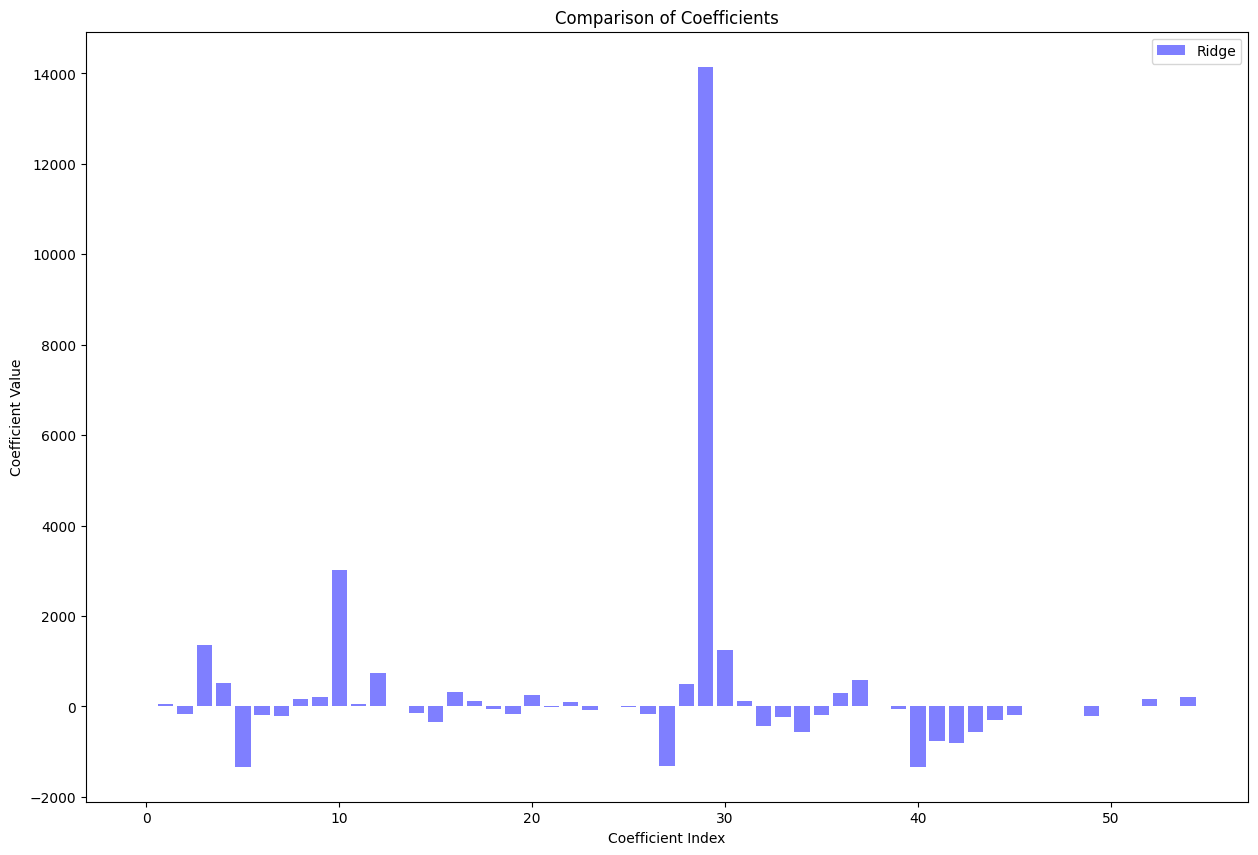

In [35]:
visualize_coef(Ridge, "Ridge", "b")
